# Multiscale Centrality

## Example notebook

This notebook shows an example implementation of multiscale centrality

In [39]:
import networkx as nx
import sys as sys
import os as os
import pickle as pickle
import yaml as yaml
import numpy as np
import matplotlib.pyplot as plt

from multiscale_centrality import Multiscale_Centrality



Define graph as networkx object

In [2]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)


Define hyperparameters for multiscale centrality

In [3]:
# random walk parameters
normalization_tpe = 'combinatorial'  # combinatorial laplacian
rw_tpe = 'continuous'  # continuous random walk
rev = False # undirected
t_min = -1.3  # maximum time (in spectral gap units)
t_max = 0.5    # maximum time (in spectral gap units)
n_t = 1000  # number of timesteps 

#plotting parameters
n_plot    = 50 # number of plots when scanning the time horizon

#number of cpu to use for parallel computations
n_processes = 2

Define Multiscale centrality object

In [4]:
# define msc object
mc = Multiscale_Centrality(G, pos, t_min = t_min, t_max = t_max, n_t = n_t, n_processes = n_processes, normalization_tpe = normalization_tpe, rw_tpe = rw_tpe, rev = rev)


Spectral gap =  0.4685252267013894


Compute multiscale centrality

100%|██████████| 1000/1000 [00:01<00:00, 827.95it/s]


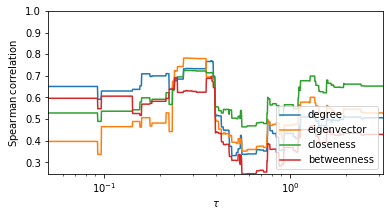

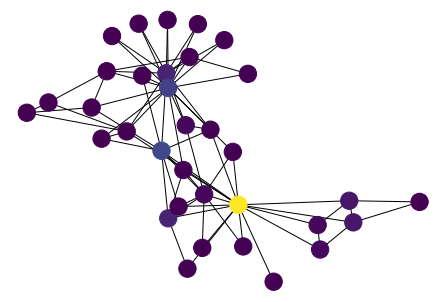

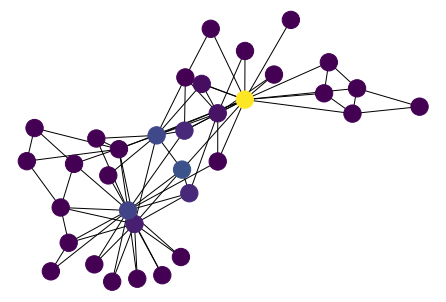

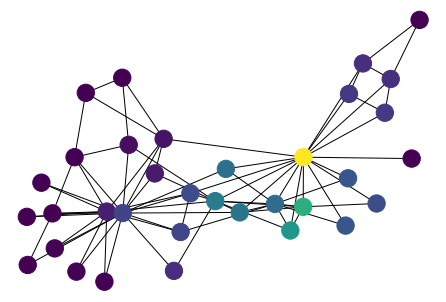

In [42]:

# create mask
p = np.zeros(len(G))
p[0:17] = 1
mc.node_mask = p

# compute multiscale
mc.compute_multiscale_centralities()

mc.compare_centralities(n_compare = n_t, n_top = 2, n_force = 100)
mc.figsize=(6,3)
mc.plot_comparisons_spearman()
 
plt.figure();nx.draw(G,node_color=mc.multiscale[:,0])
plt.figure();nx.draw(G,node_color=mc.multiscale[:,400])
plt.figure();nx.draw(G,node_color=mc.multiscale[:,900])

100%|██████████| 1000/1000 [00:01<00:00, 792.87it/s]


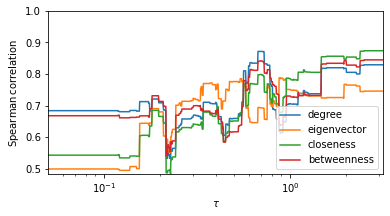

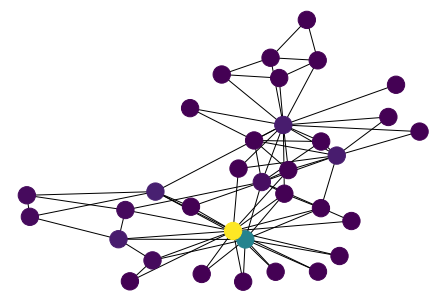

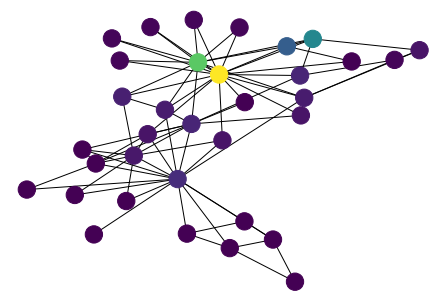

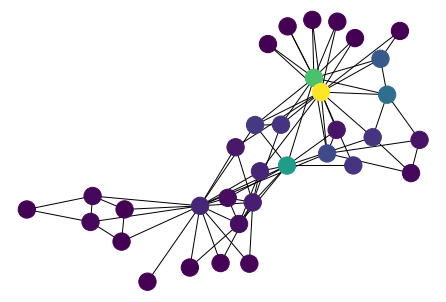

In [41]:

# create mask
p = np.zeros(len(G))
p[-20:] = 1
mc.node_mask = p

# compute multiscale
mc.compute_multiscale_centralities()

mc.compare_centralities(n_compare = n_t, n_top = 2, n_force = 100)
mc.figsize=(6,3)
mc.plot_comparisons_spearman()
 
plt.figure();nx.draw(G,node_color=mc.multiscale[:,0])
plt.figure();nx.draw(G,node_color=mc.multiscale[:,400])
plt.figure();nx.draw(G,node_color=mc.multiscale[:,900])